In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('ARIMA Model Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('WTI Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

In [ ]:
df = pd.read_excel("WTI.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,WTI,WTI_LAG,Equity Market Volatility,Economic Policy Uncertainty Europe,NY Business Conditions,3 Month Treasury Bill,Infectious Disease Tracker,Nickel,COV19,RUWAR
DATE,,,,,,,,,,
2001-10-01,-0.167019,-0.043688,22.46,141.35,-4.5,-0.72,0.39,-0.088497,0,0
2001-11-01,-0.121172,-0.167019,-13.09,-10.39,-2.2,-0.48,-0.06,-0.045894,0,0
2001-12-01,-0.012811,-0.121172,-2.94,-39.39,-6.8,-0.29,0.09,0.060355,0,0
2002-01-01,0.016876,-0.012811,-2.04,-53.76,11.7,-0.18,-0.39,0.035324,0,0
2002-02-01,0.049466,0.016876,4.29,-5.87,11.2,-0.04,0.29,0.131247,0,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,-0.018755,-0.104312,2.93,21.28,-42.6,0.22,2.32,-0.071308,1,1
2023-07-01,0.079594,-0.018755,-5.14,-18.30,38.4,0.02,-2.45,-0.041580,1,1
2023-08-01,0.067598,0.079594,-0.72,16.36,-5.5,0.09,-0.81,-0.006711,1,1


In [ ]:
y = df['WTI']
X = df[["WTI_LAG","Equity Market Volatility","Economic Policy Uncertainty Europe","NY Business Conditions","3 Month Treasury Bill","Infectious Disease Tracker","Nickel","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WTI   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     7.575
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           7.77e-10
Time:                        13:56:25   Log-Likelihood:                 250.96
No. Observations:                 265   AIC:                            -481.9
Df Residuals:                     255   BIC:                            -446.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0031      0.006      0.481      0.631      -0.010       0.016
WTI_LAG                                0.2026      0.062      3.282      0.001       0.081       0.324
Equity Market Volatility              -0.0007      0.001     -0.803      0.422      -0.003       0.001
Economic Policy Uncertainty Europe    -0.0002      0.000     -1.683      0.094      -0.001    4.02e-05
NY Business Conditions                -0.0004      0.000     -0.763      0.446      -0.001       0.001
3 Month Treasury Bill                  0.0295      0.036      0.814      0.416      -0.042       0.101
Infectious Disease Tracker            -0.0075      0.002     -4.283      0.000      -0.011      -0.004
Nickel                                 0.0901      0.072      1.252      0.212      -0.052       0.232
COV19                                  0.0130      0.020      0.640      0.523      -0.027       0.053
RUWAR                                 -0.0269      0.030     -0.883      0.378      -0.087       0.033
==============================================================================
Omnibus:                       21.744   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.679
Skew:                          -0.201   Prob(JB):                     4.49e-16
Kurtosis:                       5.498   Cond. No.                         575.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
selected_columns = ["WTI","WTI_LAG","Economic Policy Uncertainty Europe","Infectious Disease Tracker"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,WTI,WTI_LAG,Economic Policy Uncertainty Europe,Infectious Disease Tracker
DATE,,,,
2001-10-01,-0.167019,-0.043688,141.35,0.39
2001-11-01,-0.121172,-0.167019,-10.39,-0.06
2001-12-01,-0.012811,-0.121172,-39.39,0.09
2002-01-01,0.016876,-0.012811,-53.76,-0.39
2002-02-01,0.049466,0.016876,-5.87,0.29
...,...,...,...,...
2023-06-01,-0.018755,-0.104312,21.28,2.32
2023-07-01,0.079594,-0.018755,-18.30,-2.45
2023-08-01,0.067598,0.079594,16.36,-0.81


In [ ]:
# Splitting the dataset
train_df = pruned_df.iloc[:-24]
test_df = pruned_df.iloc[-24:]


In [ ]:
# Separate the target variable and the features
X_train = train_df[["WTI_LAG", "Economic Policy Uncertainty Europe", "Infectious Disease Tracker"]]
y_train = train_df["WTI"]

X_test = test_df[["WTI_LAG", "Economic Policy Uncertainty Europe", "Infectious Disease Tracker"]]
y_test = test_df["WTI"]

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 500],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [1, 1.5]
}

# Create the model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1.5, 'subsample': 0.7}


In [ ]:
results = pd.DataFrame({'y_test': y_test, 'predictions': predictions})

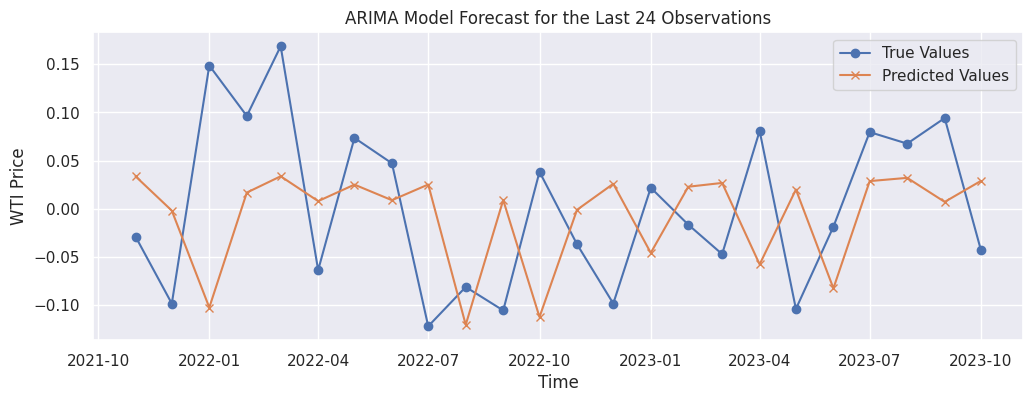

In [ ]:
plotFor(results.y_test, results.predictions)

In [ ]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.0897
MAPE: 146.3879 %
MSE: 0.0106
RMSE: 0.1028


## Saving Prediction

In [ ]:
df = pd.DataFrame({'WTI M XG': predictions, 'Actual': y_test})
df.to_excel("WTI_M_XG_forecast.xlsx", index=True)
df

,WTI M XG,Actual
DATE,,
2021-11-01,0.033629,-0.029013
2021-12-01,-0.002049,-0.098715
2022-01-01,-0.102839,0.148857
2022-02-01,0.016698,0.096380
2022-03-01,0.033656,0.168882
2022-04-01,0.007815,-0.063937
2022-05-01,0.024982,0.073567
2022-06-01,0.008784,0.047159
2022-07-01,0.025095,-0.122299


In [ ]:
# Open a file in write mode
with open('WTI M XG Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')